<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-4'

In [4]:
os.listdir(base_path)

['data_add_delta_-4_n20.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.142140,40.346972,29.342056,4.603891e-07,99.831168,99.831168,2.951296e-07
1,0.0,1.0,87.295109,22.127296,31.060232,5.774687e-06,150.482643,150.482638,4.992898e-06
2,0.0,2.0,20.889998,21.878955,81.120944,-1.962284e-06,133.889895,133.889896,-1.559154e-06
3,0.0,3.0,61.350040,33.808679,22.773941,-4.594080e-07,127.932660,127.932661,-1.082142e-06
4,0.0,4.0,20.981852,49.778853,59.512168,-1.279382e-07,140.272873,140.272872,9.207588e-08
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.473114,62.310116,79.162440,1.115453e-07,246.945670,246.945670,3.533366e-07
19996,999.0,16.0,63.366624,38.800476,52.054682,-5.296724e-07,164.221782,164.221782,-4.297092e-07
19997,999.0,17.0,89.956141,33.621607,24.751056,7.005799e-07,158.328805,158.328805,3.438135e-07
19998,999.0,18.0,98.608518,20.630904,73.638140,6.332162e-07,202.877564,202.877563,9.963832e-07


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.142140,40.346972,29.342056,4.603891e-07,99.831168,99.831168,2.951296e-07
1,0.0,1.0,87.295109,22.127296,31.060232,5.774687e-06,150.482643,150.482638,4.992898e-06
2,0.0,2.0,20.889998,21.878955,81.120944,-1.962284e-06,133.889895,133.889896,-1.559154e-06
3,0.0,3.0,61.350040,33.808679,22.773941,-4.594080e-07,127.932660,127.932661,-1.082142e-06
4,0.0,4.0,20.981852,49.778853,59.512168,-1.279382e-07,140.272873,140.272872,9.207588e-08
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.473114,62.310116,79.162440,1.115453e-07,246.945670,246.945670,3.533366e-07
19996,999.0,16.0,63.366624,38.800476,52.054682,-5.296724e-07,164.221782,164.221782,-4.297092e-07
19997,999.0,17.0,89.956141,33.621607,24.751056,7.005799e-07,158.328805,158.328805,3.438135e-07
19998,999.0,18.0,98.608518,20.630904,73.638140,6.332162e-07,202.877564,202.877563,9.963832e-07


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    20.142140  40.346972  ...   99.831168  2.951296e-07
      1.0    87.295109  22.127296  ...  150.482638  4.992898e-06
      2.0    20.889998  21.878955  ...  133.889896 -1.559154e-06
      3.0    61.350040  33.808679  ...  127.932661 -1.082142e-06
      4.0    20.981852  49.778853  ...  140.272872  9.207588e-08
...                ...        ...  ...         ...           ...
999.0 15.0   95.473114  62.310116  ...  246.945670  3.533366e-07
      16.0   63.366624  38.800476  ...  164.221782 -4.297092e-07
      17.0   89.956141  33.621607  ...  158.328805  3.438135e-07
      18.0   98.608518  20.630904  ...  202.877563  9.963832e-07
      19.0   30.751850  23.557675  ...  103.013361  6.677080e-07

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    20.142140  40.346972  ...   99.831168  2.951296e-07
      1.0    87.295109  22.127296  ...  150.482638  4.992898e-06
      2.0    20.889998  21.878955  ...  133.889896 -1.559154e-06
      3.0    61.350040  33.808679  ...  127.932661 -1.082142e-06
      4.0    20.981852  49.778853  ...  140.272872  9.207588e-08
...                ...        ...  ...         ...           ...
999.0 15.0   95.473114  62.310116  ...  246.945670  3.533366e-07
      16.0   63.366624  38.800476  ...  164.221782 -4.297092e-07
      17.0   89.956141  33.621607  ...  158.328805  3.438135e-07
      18.0   98.608518  20.630904  ...  202.877563  9.963832e-07
      19.0   30.751850  23.557675  ...  103.013361  6.677080e-07

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.142140,40.346972,29.342056,4.603891e-07,99.831168,99.831168,2.951296e-07
1,0.0,1.0,87.295109,22.127296,31.060232,5.774687e-06,150.482643,150.482638,4.992898e-06
2,0.0,2.0,20.889998,21.878955,81.120944,-1.962284e-06,133.889895,133.889896,-1.559154e-06
3,0.0,3.0,61.350040,33.808679,22.773941,-4.594080e-07,127.932660,127.932661,-1.082142e-06
4,0.0,4.0,20.981852,49.778853,59.512168,-1.279382e-07,140.272873,140.272872,9.207588e-08
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.473114,62.310116,79.162440,1.115453e-07,246.945670,246.945670,3.533366e-07
19996,999.0,16.0,63.366624,38.800476,52.054682,-5.296724e-07,164.221782,164.221782,-4.297092e-07
19997,999.0,17.0,89.956141,33.621607,24.751056,7.005799e-07,158.328805,158.328805,3.438135e-07
19998,999.0,18.0,98.608518,20.630904,73.638140,6.332162e-07,202.877564,202.877563,9.963832e-07


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    20.142140  40.346972  ...   99.831168  2.951296e-07
      1.0    87.295109  22.127296  ...  150.482638  4.992898e-06
      2.0    20.889998  21.878955  ...  133.889896 -1.559154e-06
      3.0    61.350040  33.808679  ...  127.932661 -1.082142e-06
      4.0    20.981852  49.778853  ...  140.272872  9.207588e-08
...                ...        ...  ...         ...           ...
999.0 15.0   95.473114  62.310116  ...  246.945670  3.533366e-07
      16.0   63.366624  38.800476  ...  164.221782 -4.297092e-07
      17.0   89.956141  33.621607  ...  158.328805  3.438135e-07
      18.0   98.608518  20.630904  ...  202.877563  9.963832e-07
      19.0   30.751850  23.557675  ...  103.013361  6.677080e-07

[20000 rows x 7 columns]

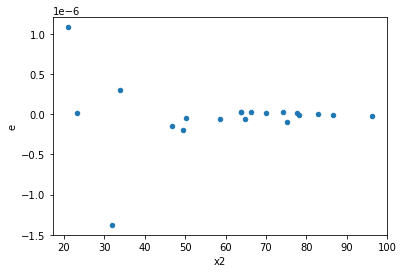

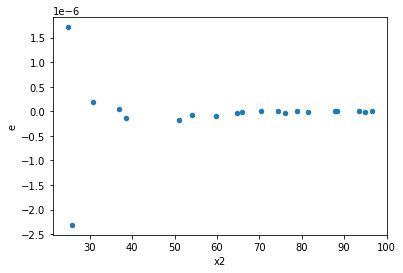

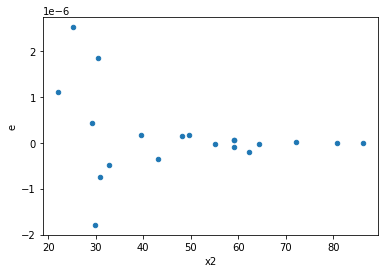

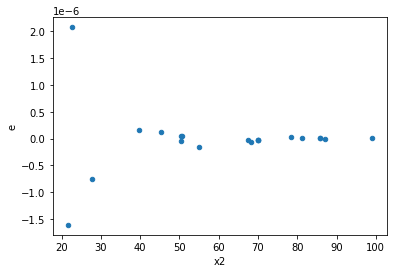

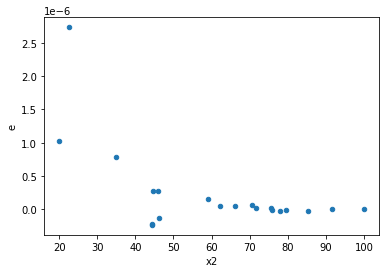

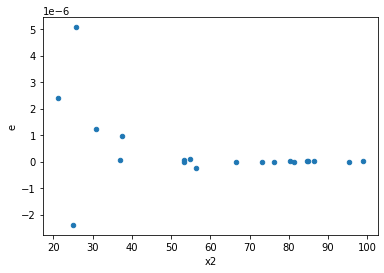

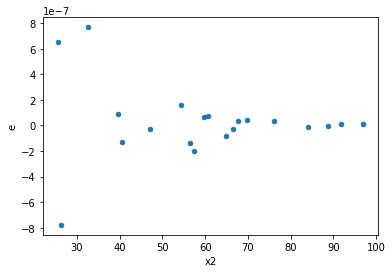

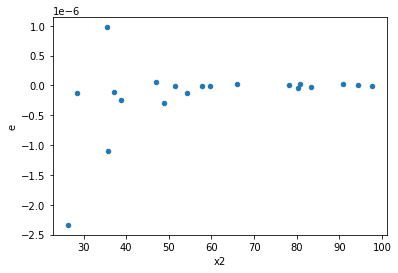

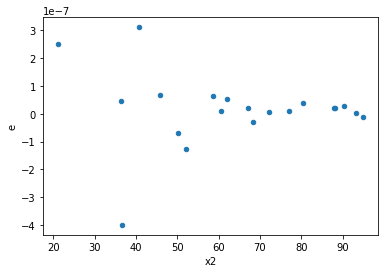

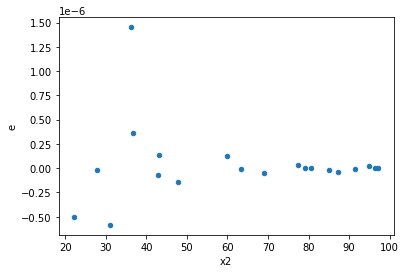

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,5.797201863372797e-15,1.6189670392434653e-11,1.4493004658431992e-15,4.047417598108663e-12,0.0003580802896445501,2.6328406666248697e-08,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,5.958719928259384e-16,9.055322552210061e-13,1.489679982064846e-16,2.2638306380525152e-13,0.0006580350831130898,1.2040129884716457e-07,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,3.5448703898899936e-15,3.588528224821087e-13,8.862175974724984e-16,8.971320562052718e-14,0.009878340555804685,0.00010174177943133747,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,6.3466051609635385e-15,6.309749036354254e-12,1.5866512902408846e-15,1.5774372590885636e-12,0.0010058411395440505,3.4737060318077127e-07,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,3.500435977475517e-15,8.130859873203461e-13,8.751089943688792e-16,2.0327149683008653e-13,0.004305123974663195,1.3011615217218303e-05,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,1.3034257041766366e-15,6.975259887080768e-12,3.2585642604415916e-16,1.743814971770192e-12,0.0001868641061805851,5.18267222081669e-09,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,4.045821155006202e-16,4.818835407471585e-11,1.0114552887515504e-16,1.2047088518678962e-11,8.395848400908593e-06,2.2191020637791133e-12,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,3.3235128406663766e-16,1.4390164083482141e-12,8.308782101665941e-17,3.5975410208705353e-13,0.00023095725812336608,8.800344743921089e-09,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,4.343682981438327e-15,2.5852773490868695e-12,1.0859207453595817e-15,6.463193372717174e-13,0.0016801613115020456,1.2496910442046535e-06,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64